In [6]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



In [9]:
import os
print(os.getcwd())


d:\projetos\projetos-data-science\Car-Price-Prediction\notebooks


In [13]:
# Carregando os dados
df = pd.read_csv('data/raw/car_prices.csv')

In [14]:
# Análise Exploratória Básica
print(df.head())
print(df.info())

   Unnamed: 0 Mês de referência Código Fipe       Marca  Modelo  Preço Médio  \
0           0        2020-09-01    018065-3  Kia Motors   Bongo        88823   
1           1        2020-09-01    018093-9  Kia Motors  Cerato        96201   
2           2        2020-09-01    018092-0  Kia Motors  Cerato       105540   
3           3        2020-09-01    018089-0  Kia Motors   Grand       326020   
4           4        2020-09-01    018094-7  Kia Motors     RIO        80331   

  Combustivel                  Tração Litros Valvulas    v     cv    p Cambio  \
0      Diesel  4x2 | Integral on-road    2.5      NaN  NaN    NaN  NaN    NaN   
1        Flex  4x2 | Integral on-road    2.0      16V  NaN    NaN  NaN    Aut   
2        Flex  4x2 | Integral on-road    2.0      16V  NaN    NaN  NaN    Aut   
3    Gasolina  4x2 | Integral on-road    3.3      24V   V6  270.0  NaN    Aut   
4        Flex  4x2 | Integral on-road    1.6      NaN  NaN    NaN  NaN    Aut   

    Inducao       versao  
0    

In [15]:
# Verificando valores nulos
print(df.isnull().sum())

Unnamed: 0               0
Mês de referência        0
Código Fipe              0
Marca                    0
Modelo                   0
Preço Médio              0
Combustivel              0
Tração                   0
Litros                3923
Valvulas             35928
v                    75699
cv                   68892
p                    52167
Cambio               49150
Inducao                  0
versao                4591
dtype: int64


In [17]:
# Preenchendo ou removendo valores nulos (aqui, vamos preencher com a média para valores numéricos e 'Desconhecido' para categóricos)
for column in df.columns:
    if df[column].dtype == object:  # Aqui substituímos np.object por object
        df[column].fillna('Desconhecido', inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)


In [18]:
# Conversão de colunas de data
df['Mês de referência'] = pd.to_datetime(df['Mês de referência'])

In [20]:
# Codificação de variáveis categóricas
label_encoders = {}
categorical_columns = ['Marca', 'Modelo', 'Combustivel', 'Tração', 'Cambio', 'Inducao', 'versao']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [21]:
# Divisão dos dados em treino e teste
X = df.drop('Preço Médio', axis=1)
y = df['Preço Médio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Preenchendo valores nulos
for column in df.columns:
    if df[column].dtype == object:
        df[column].fillna('Desconhecido', inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Convertendo a coluna de data em características numéricas, se ela existir
if 'Mês de referência' in df.columns:
    df['year'] = df['Mês de referência'].dt.year
    df['month'] = df['Mês de referência'].dt.month
    df['day'] = df['Mês de referência'].dt.day
    df.drop('Mês de referência', axis=1, inplace=True)

# Dividindo os dados novamente após o tratamento
X = df.drop('Preço Médio', axis=1)
y = df['Preço Médio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificando colunas categóricas
label_encoders = {}
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns

for col in non_numeric_columns:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], pd.Series(['Desconhecido'])]))  # Usando pandas.concat
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col].map(lambda s: 'Desconhecido' if s not in le.classes_ else s))
    label_encoders[col] = le

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# Treinamento do modelo (vamos usar uma regressão linear como exemplo inicial)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Previsões
y_pred = model.predict(X_test)

In [31]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 67104460669.031815
R2 Score: 0.4236630535195698


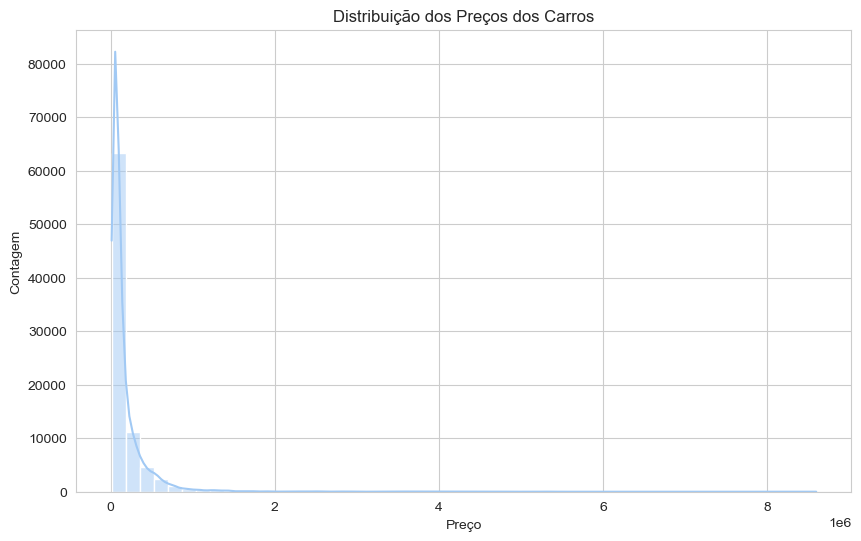

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Preços
plt.figure(figsize=(10, 6))
sns.histplot(df['Preço Médio'], bins=50, kde=True)
plt.title('Distribuição dos Preços dos Carros')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()




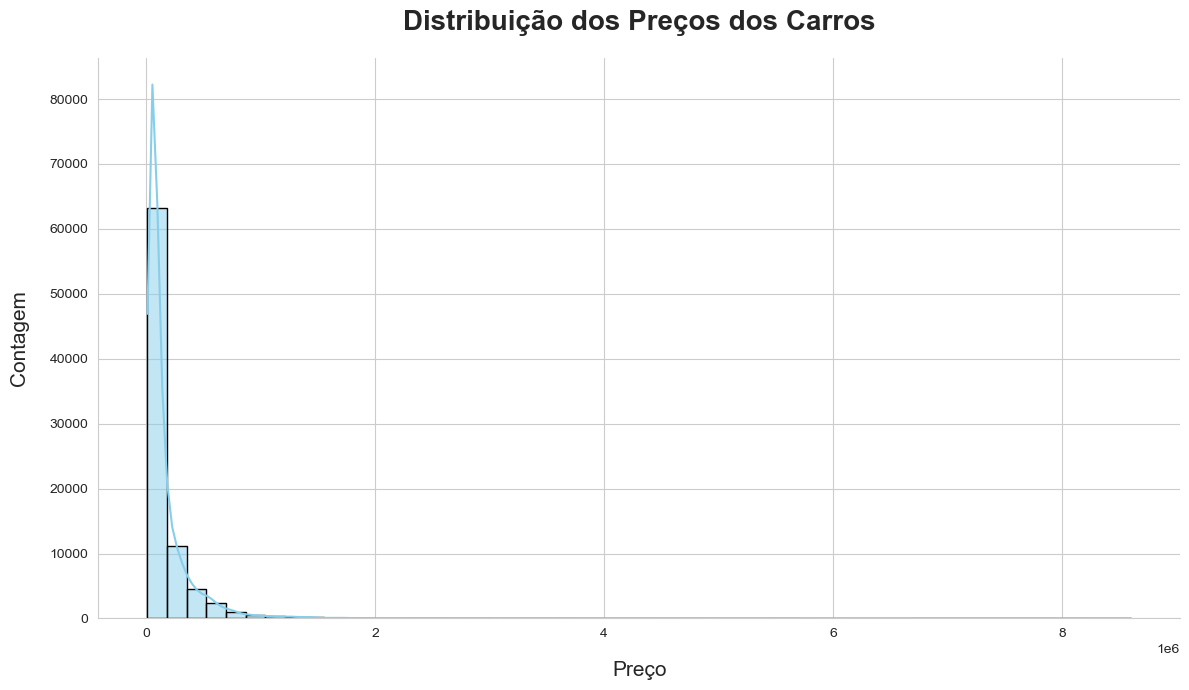

In [52]:
# Histograma de Preços customizado e profissional
# Estilo: Use um estilo de fundo mais agradável.
# Paleta de Cores: Escolha uma paleta de cores mais atraente.
# Grade: Adicione uma grade para facilitar a leitura.
# Título e Rótulos: Aumente o tamanho da fonte e ajuste o estilo para torná-los mais legíveis.
# Bordas: Remova as bordas superior e direita para um visual mais limpo.


# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Histograma de Preços
plt.figure(figsize=(12, 7))
sns.histplot(df['Preço Médio'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Título e rótulos
plt.title('Distribuição dos Preços dos Carros', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Preço', fontsize=15, labelpad=15)
plt.ylabel('Contagem', fontsize=15, labelpad=15)

# Removendo as bordas superior e direita
sns.despine(top=True, right=True)

# Mostrando o gráfico
plt.tight_layout()
plt.show()

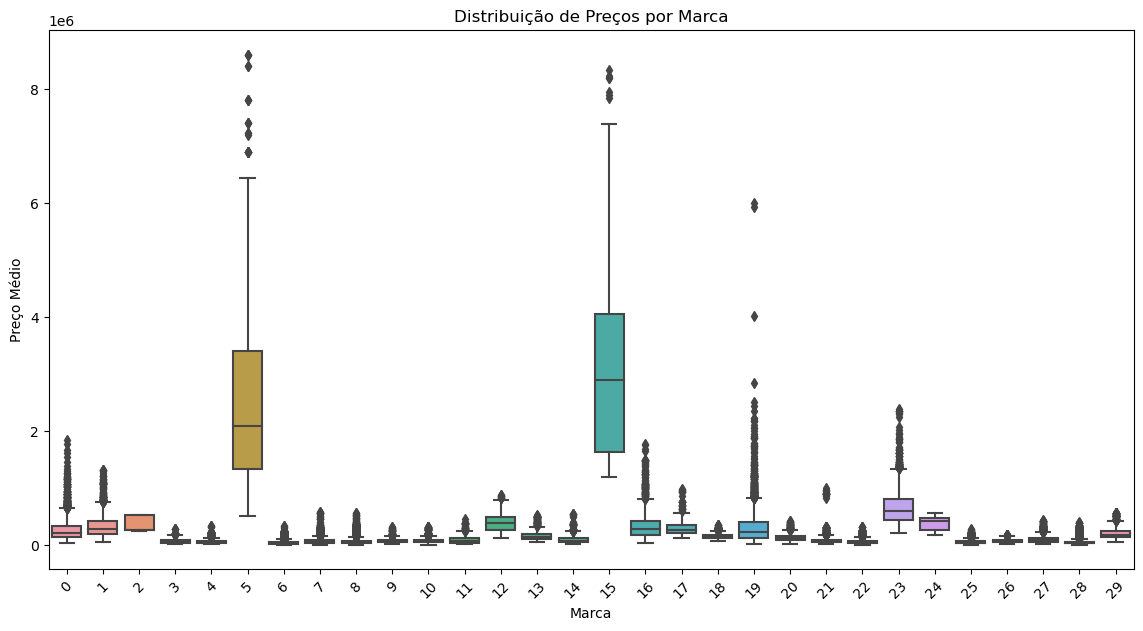

In [35]:
# Boxplots
plt.figure(figsize=(14, 7))
sns.boxplot(x=df['Marca'], y=df['Preço Médio'])
plt.title('Distribuição de Preços por Marca')
plt.xlabel('Marca')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()


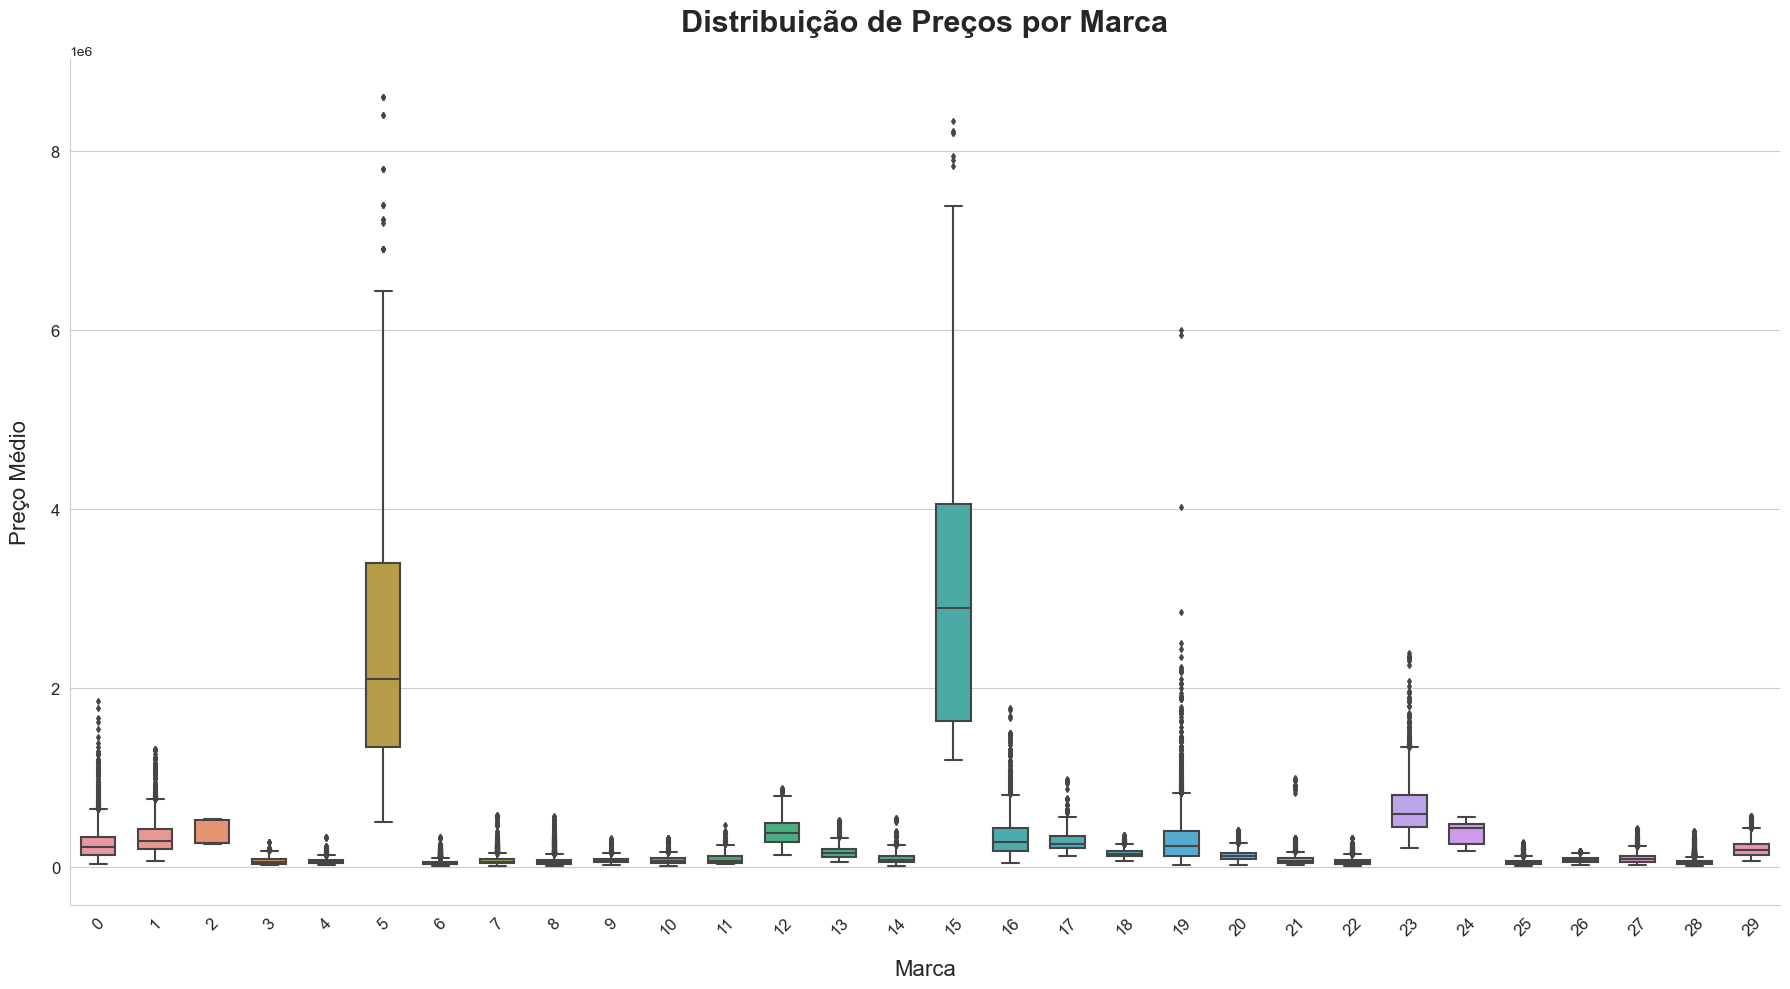

In [53]:
#Estilo e Paleta de Cores: Vamos usar um estilo de grade branca e uma paleta de cores mais agradável.
#Tamanho e Rótulos: Ajustaremos o tamanho do gráfico e o tamanho da fonte dos rótulos para torná-los mais legíveis.
#Rotação dos Rótulos: A rotação dos rótulos do eixo x ajudará a evitar a sobreposição de nomes de marcas.
#Remoção de Bordas: Vamos remover as bordas superior e direita para uma estética mais limpa.

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Boxplots
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['Marca'], y=df['Preço Médio'], width=0.6, fliersize=3)

# Título e rótulos
plt.title('Distribuição de Preços por Marca', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Marca', fontsize=16, labelpad=15)
plt.ylabel('Preço Médio', fontsize=16, labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Removendo as bordas superior e direita
sns.despine(top=True, right=True)

# Mostrando o gráfico
plt.tight_layout()
plt.show()


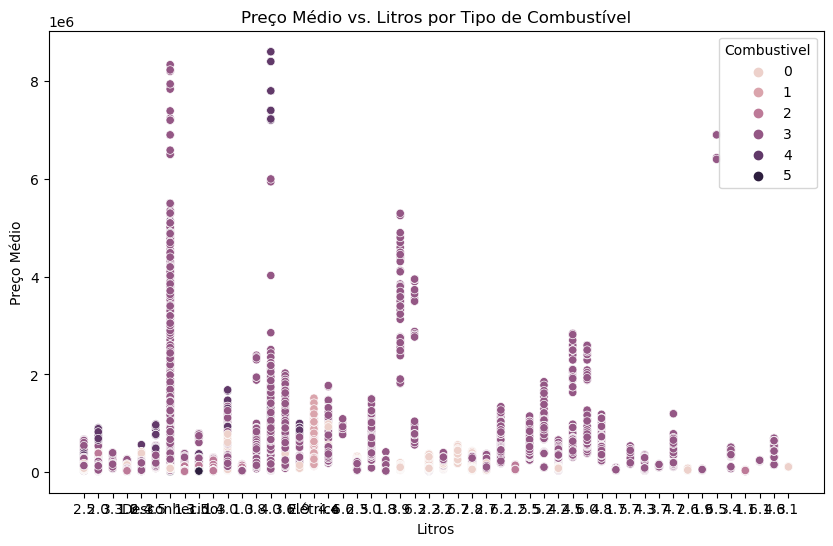

In [37]:
#Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Litros'], y=df['Preço Médio'], hue=df['Combustivel'])
plt.title('Preço Médio vs. Litros por Tipo de Combustível')
plt.xlabel('Litros')
plt.ylabel('Preço Médio')
plt.show()


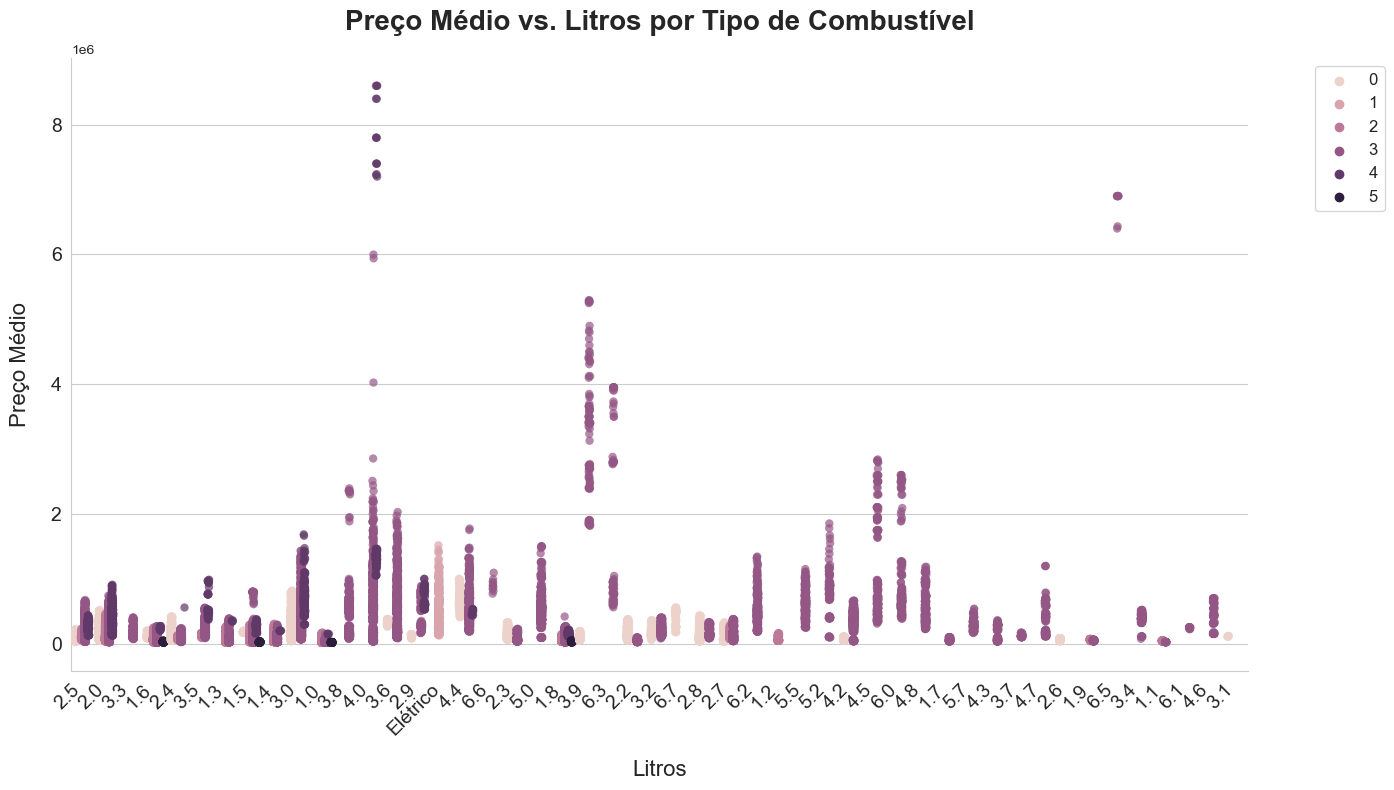

In [56]:
#Estilo e Paleta de Cores: Vamos usar um estilo de grade branca e uma paleta de cores mais agradável.
#Tamanho e Rótulos: Ajustaremos o tamanho do gráfico e o tamanho da fonte dos rótulos para torná-los mais legíveis.
#Legenda: Vamos posicionar a legenda de forma mais adequada para evitar sobreposições.
#Remoção de Bordas: Vamos remover as bordas superior e direita para uma estética mais limpa.

# Filtrando o DataFrame para remover 'Desconhecido' de 'Litros'
df_filtered = df[df['Litros'] != 'Desconhecido']

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Scatter Plots com Jitter
plt.figure(figsize=(14, 8))
sns.stripplot(x=df_filtered['Litros'], y=df_filtered['Preço Médio'], hue=df_filtered['Combustivel'], jitter=0.2, size=6, edgecolor='w', alpha=0.7, marker="o", dodge=True)

# Título e rótulos
plt.title('Preço Médio vs. Litros por Tipo de Combustível', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Litros', fontsize=16, labelpad=15)
plt.ylabel('Preço Médio', fontsize=16, labelpad=15)
plt.xticks(fontsize=14, rotation=45, ha='right')  # Adicionado alinhamento à direita para melhor visualização
plt.yticks(fontsize=14)

# Legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Removendo as bordas superior e direita
sns.despine(top=True, right=True)

# Mostrando o gráfico
plt.tight_layout()
plt.show()



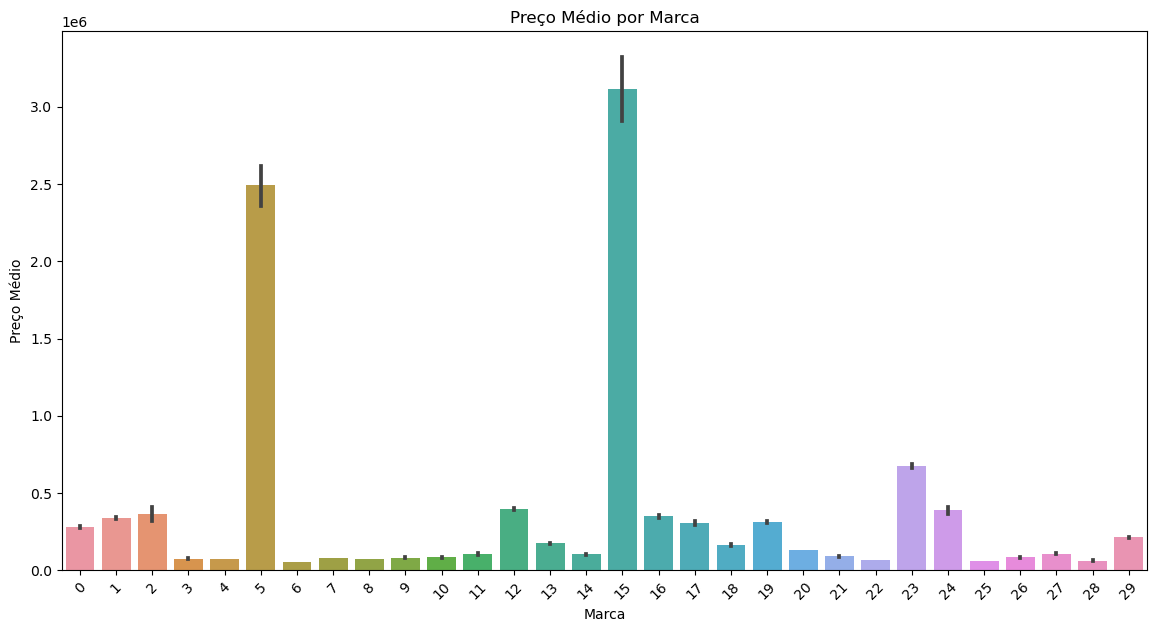

In [38]:
# Bar Plots
plt.figure(figsize=(14, 7))
sns.barplot(x=df['Marca'], y=df['Preço Médio'])
plt.title('Preço Médio por Marca')
plt.xlabel('Marca')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()


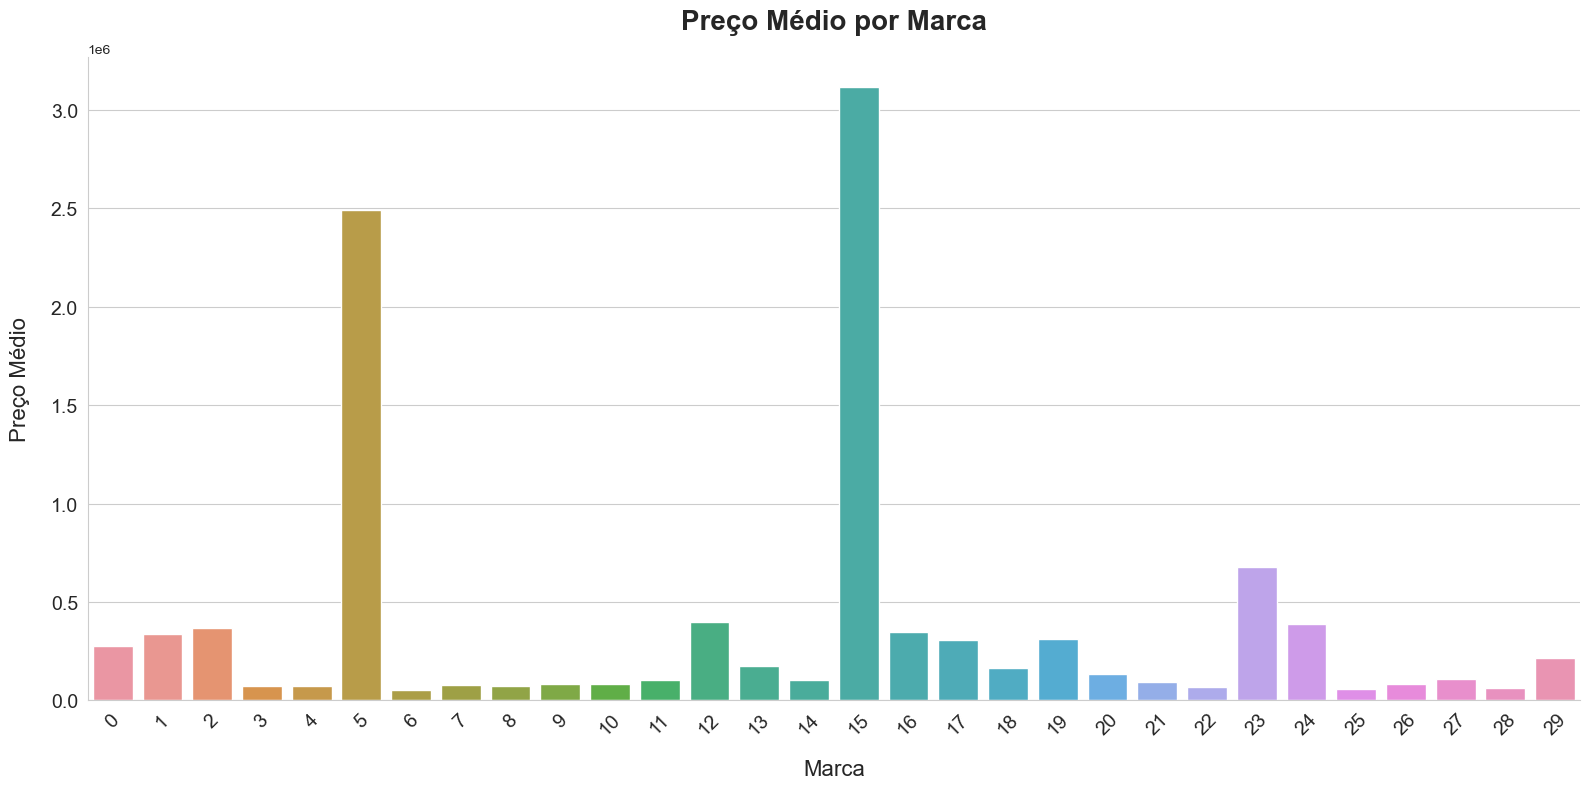

In [58]:
# Gráfico de barras mais estético e profissional, para entender e seguir as etapas abaixo:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Bar Plots
plt.figure(figsize=(16, 8))
sns.barplot(x=df['Marca'], y=df['Preço Médio'], errorbar=None)  # Usando errorbar=None em vez de ci=None

# Título e rótulos
plt.title('Preço Médio por Marca', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Marca', fontsize=16, labelpad=15)
plt.ylabel('Preço Médio', fontsize=16, labelpad=15)
plt.xticks(fontsize=14, rotation=45)  # Adicionado rotação para melhor visualização
plt.yticks(fontsize=14)

# Removendo as bordas superior e direita
sns.despine(top=True, right=True)

# Mostrando o gráfico
plt.tight_layout()
plt.show()



C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_3404\1354294349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


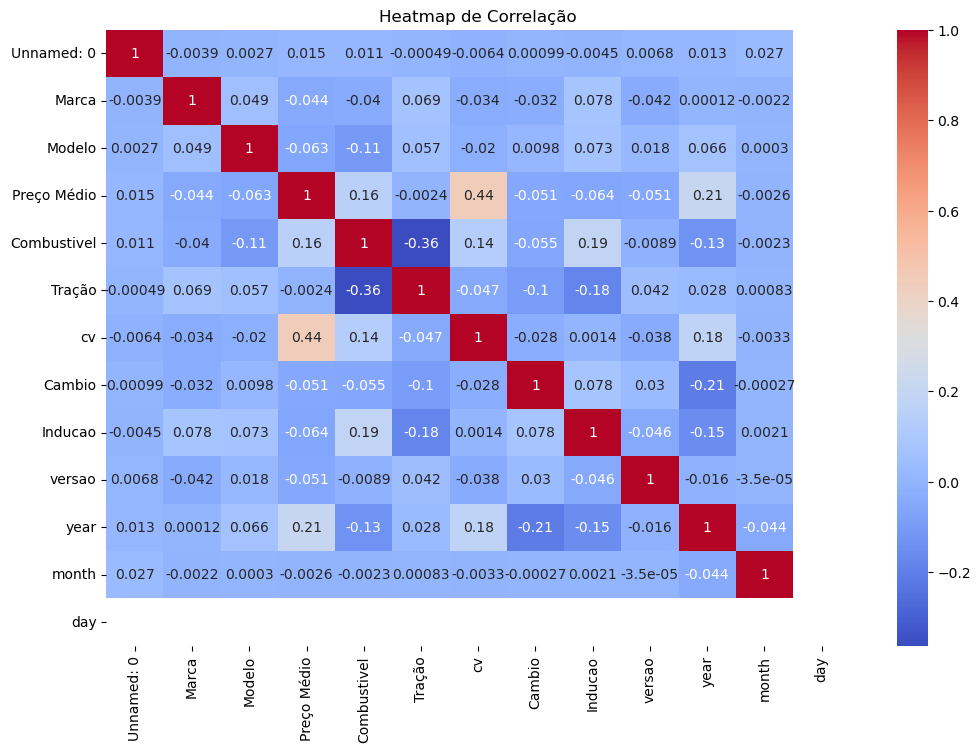

In [39]:
# Heatmaps Exemplo: Heatmap de correlação entre variáveis numéricas
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()


C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_3404\1454506500.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


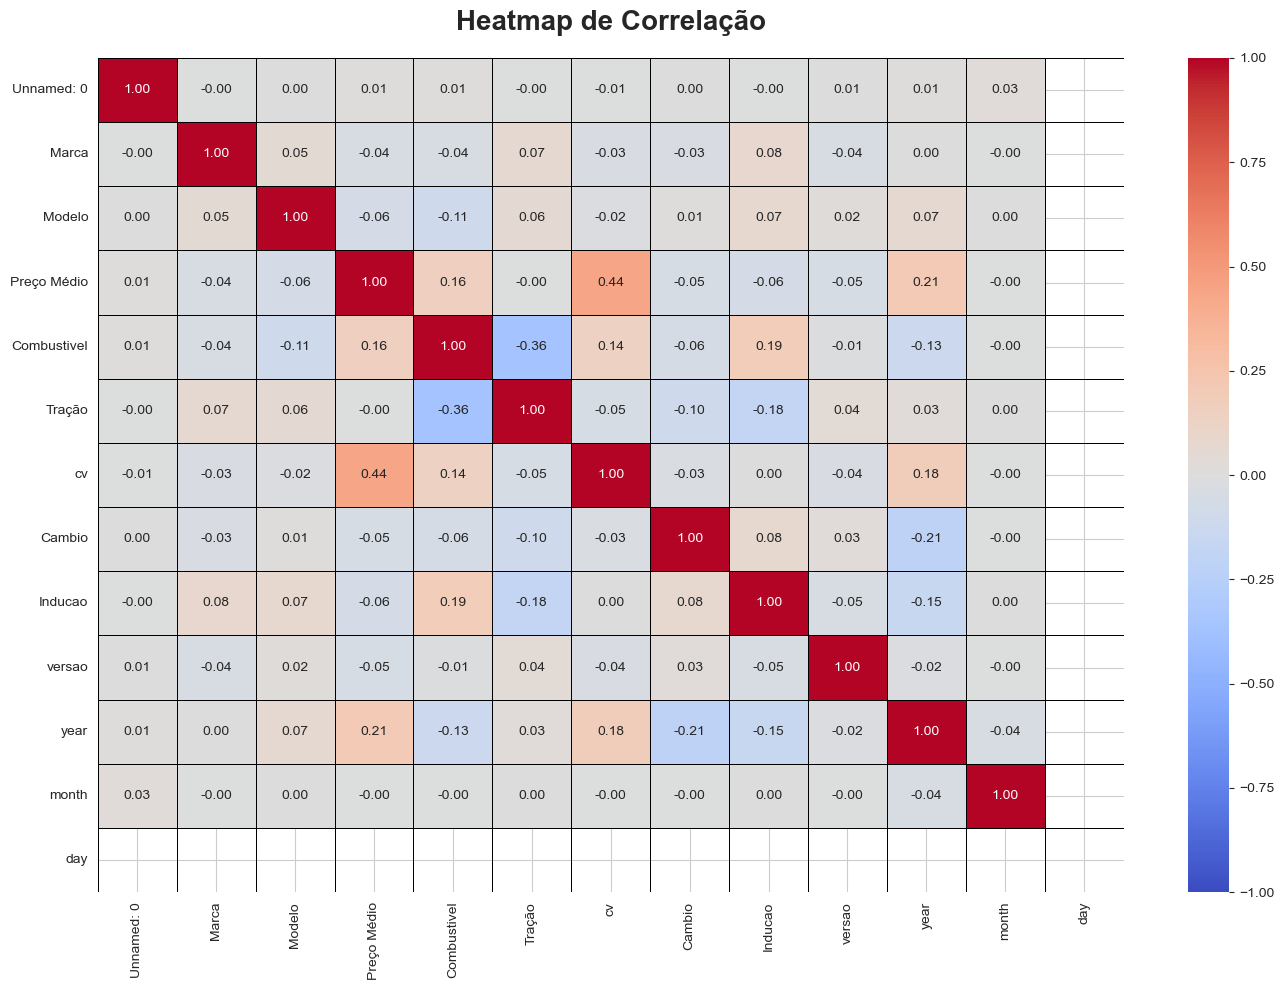

In [60]:
# Melhorando a visualização do heatmap de correlação, tornando-o mais profissional e fácil de interpretar
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Heatmap de Correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', fmt=".2f", vmin=-1, vmax=1)

# Título
plt.title('Heatmap de Correlação', fontsize=20, fontweight='bold', pad=20)

# Ajustando a visualização para evitar cortes
plt.tight_layout()

# Mostrando o gráfico
plt.show()


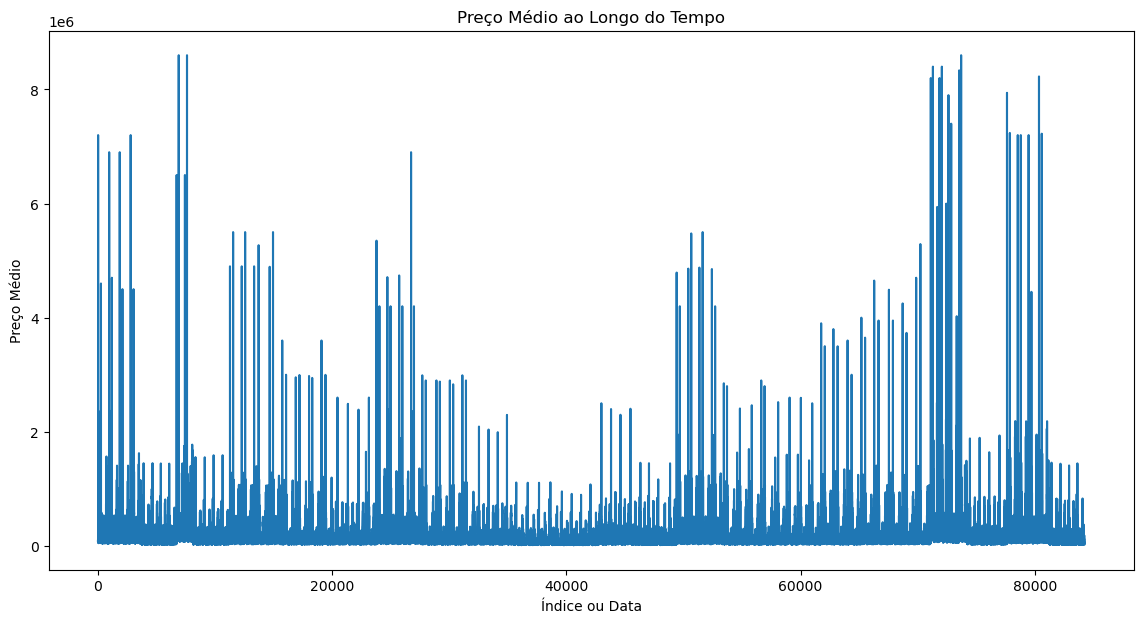

In [43]:
# Time Series Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=df.index, y=df['Preço Médio'])
plt.title('Preço Médio ao Longo do Tempo')
plt.xlabel('Índice ou Data')
plt.ylabel('Preço Médio')
plt.show()


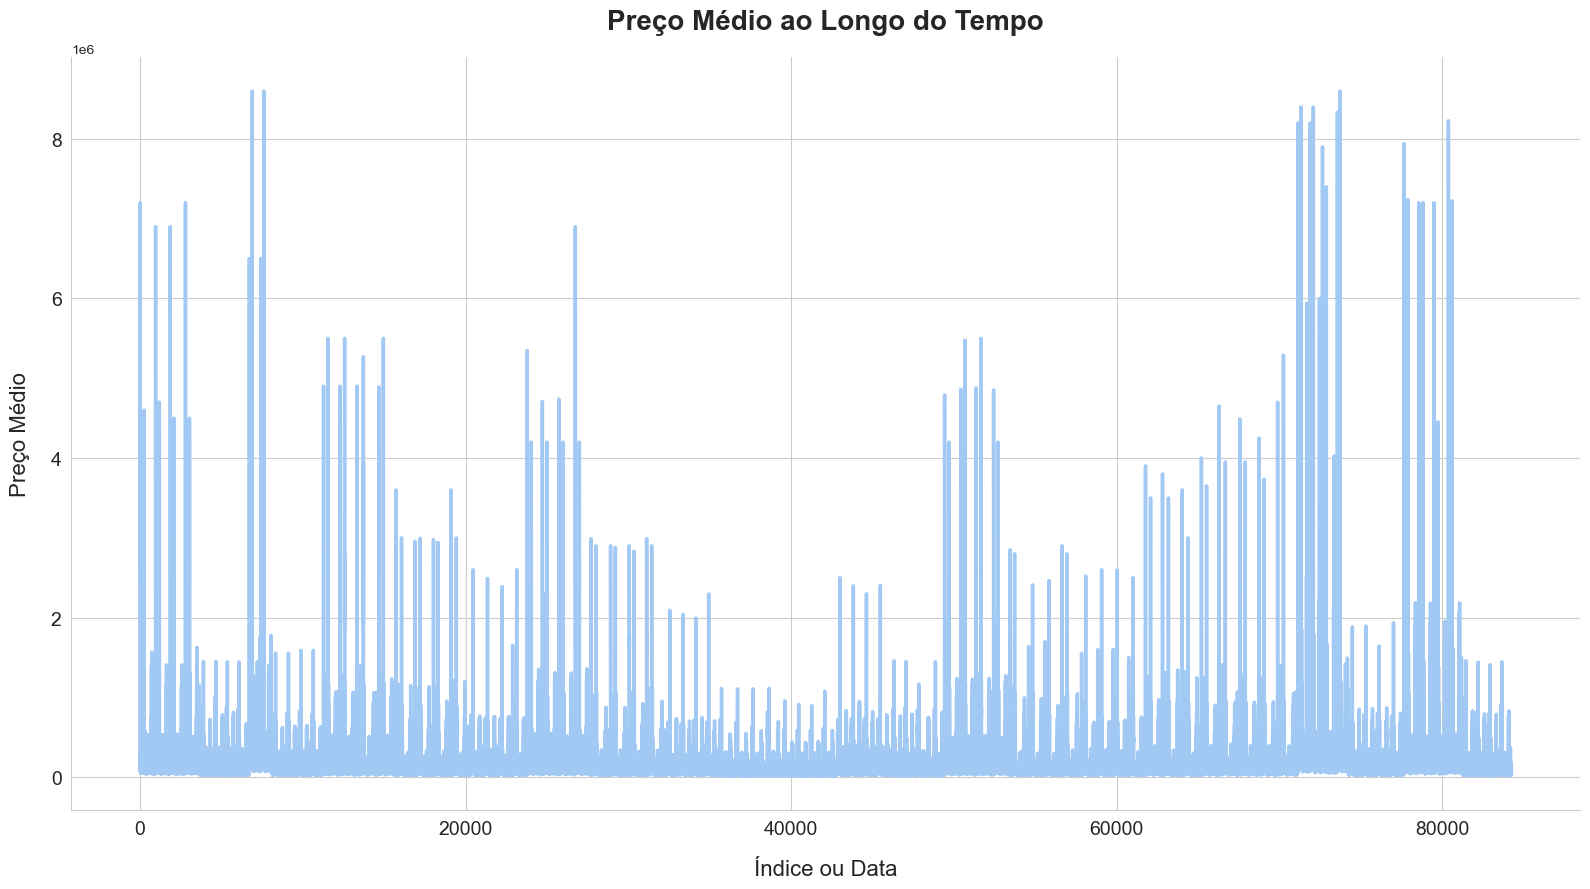

In [61]:
# Melhorando a visualização do gráfico de série temporal:
# Ajustei o tamanho do gráfico para uma melhor visualização.
# Aumentei a espessura da linha para torná-la mais visível.
# Adicionei um título mais destacado e ajustamos os rótulos dos eixos para serem mais legíveis.
# Removi as bordas superior e direita para uma estética mais limpa.

import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Time Series Plot
plt.figure(figsize=(16, 9))
sns.lineplot(x=df.index, y=df['Preço Médio'], linewidth=2.5)

# Título e rótulos
plt.title('Preço Médio ao Longo do Tempo', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Índice ou Data', fontsize=16, labelpad=15)
plt.ylabel('Preço Médio', fontsize=16, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Removendo as bordas superior e direita
sns.despine(top=True, right=True)

# Ajustando a visualização para evitar cortes
plt.tight_layout()

# Mostrando o gráfico
plt.show()


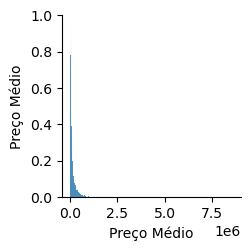

In [44]:
# Pair Plots: Selecionando algumas variáveis numéricas para visualização
sns.pairplot(df[['Preço Médio', 'Litros']])
plt.show()


C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_3404\3684940475.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Litros'] = pd.to_numeric(df_filtered['Litros'], errors='coerce')


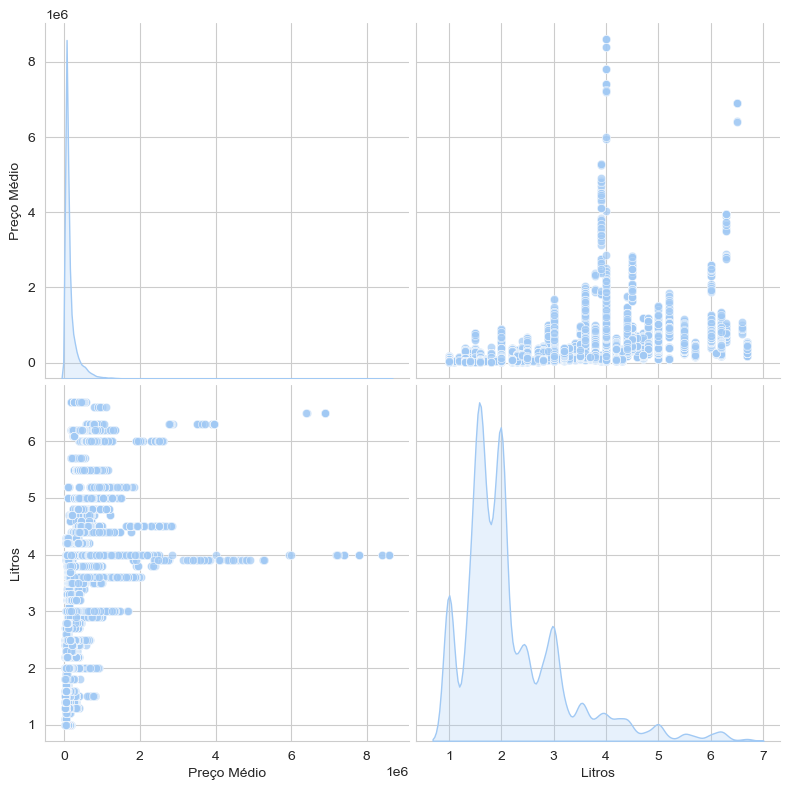

In [62]:
# Impementado para visualizar relações entre múltiplas variáveis numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Filtrando os dados para remover entradas "Desconhecido" em 'Litros'
df_filtered = df[df['Litros'] != 'Desconhecido']

# Convertendo a coluna 'Litros' para numérico
df_filtered['Litros'] = pd.to_numeric(df_filtered['Litros'], errors='coerce')

# Pair Plots
sns.pairplot(df_filtered[['Preço Médio', 'Litros']], height=4, plot_kws={'alpha':0.7, 'edgecolor':'w'}, diag_kind='kde')

# Mostrando o gráfico
plt.show()


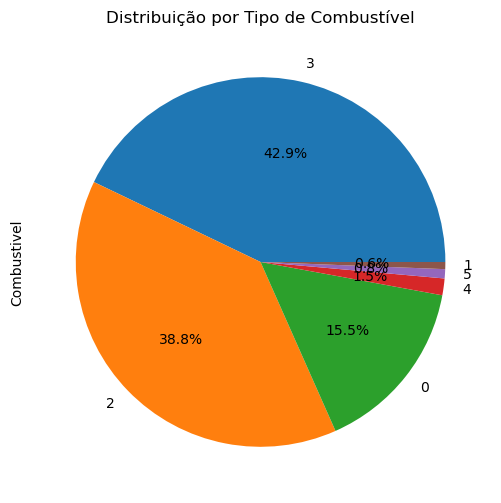

In [46]:
# Pie Charts
plt.figure(figsize=(10, 6))
df['Combustivel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição por Tipo de Combustível')
plt.show()


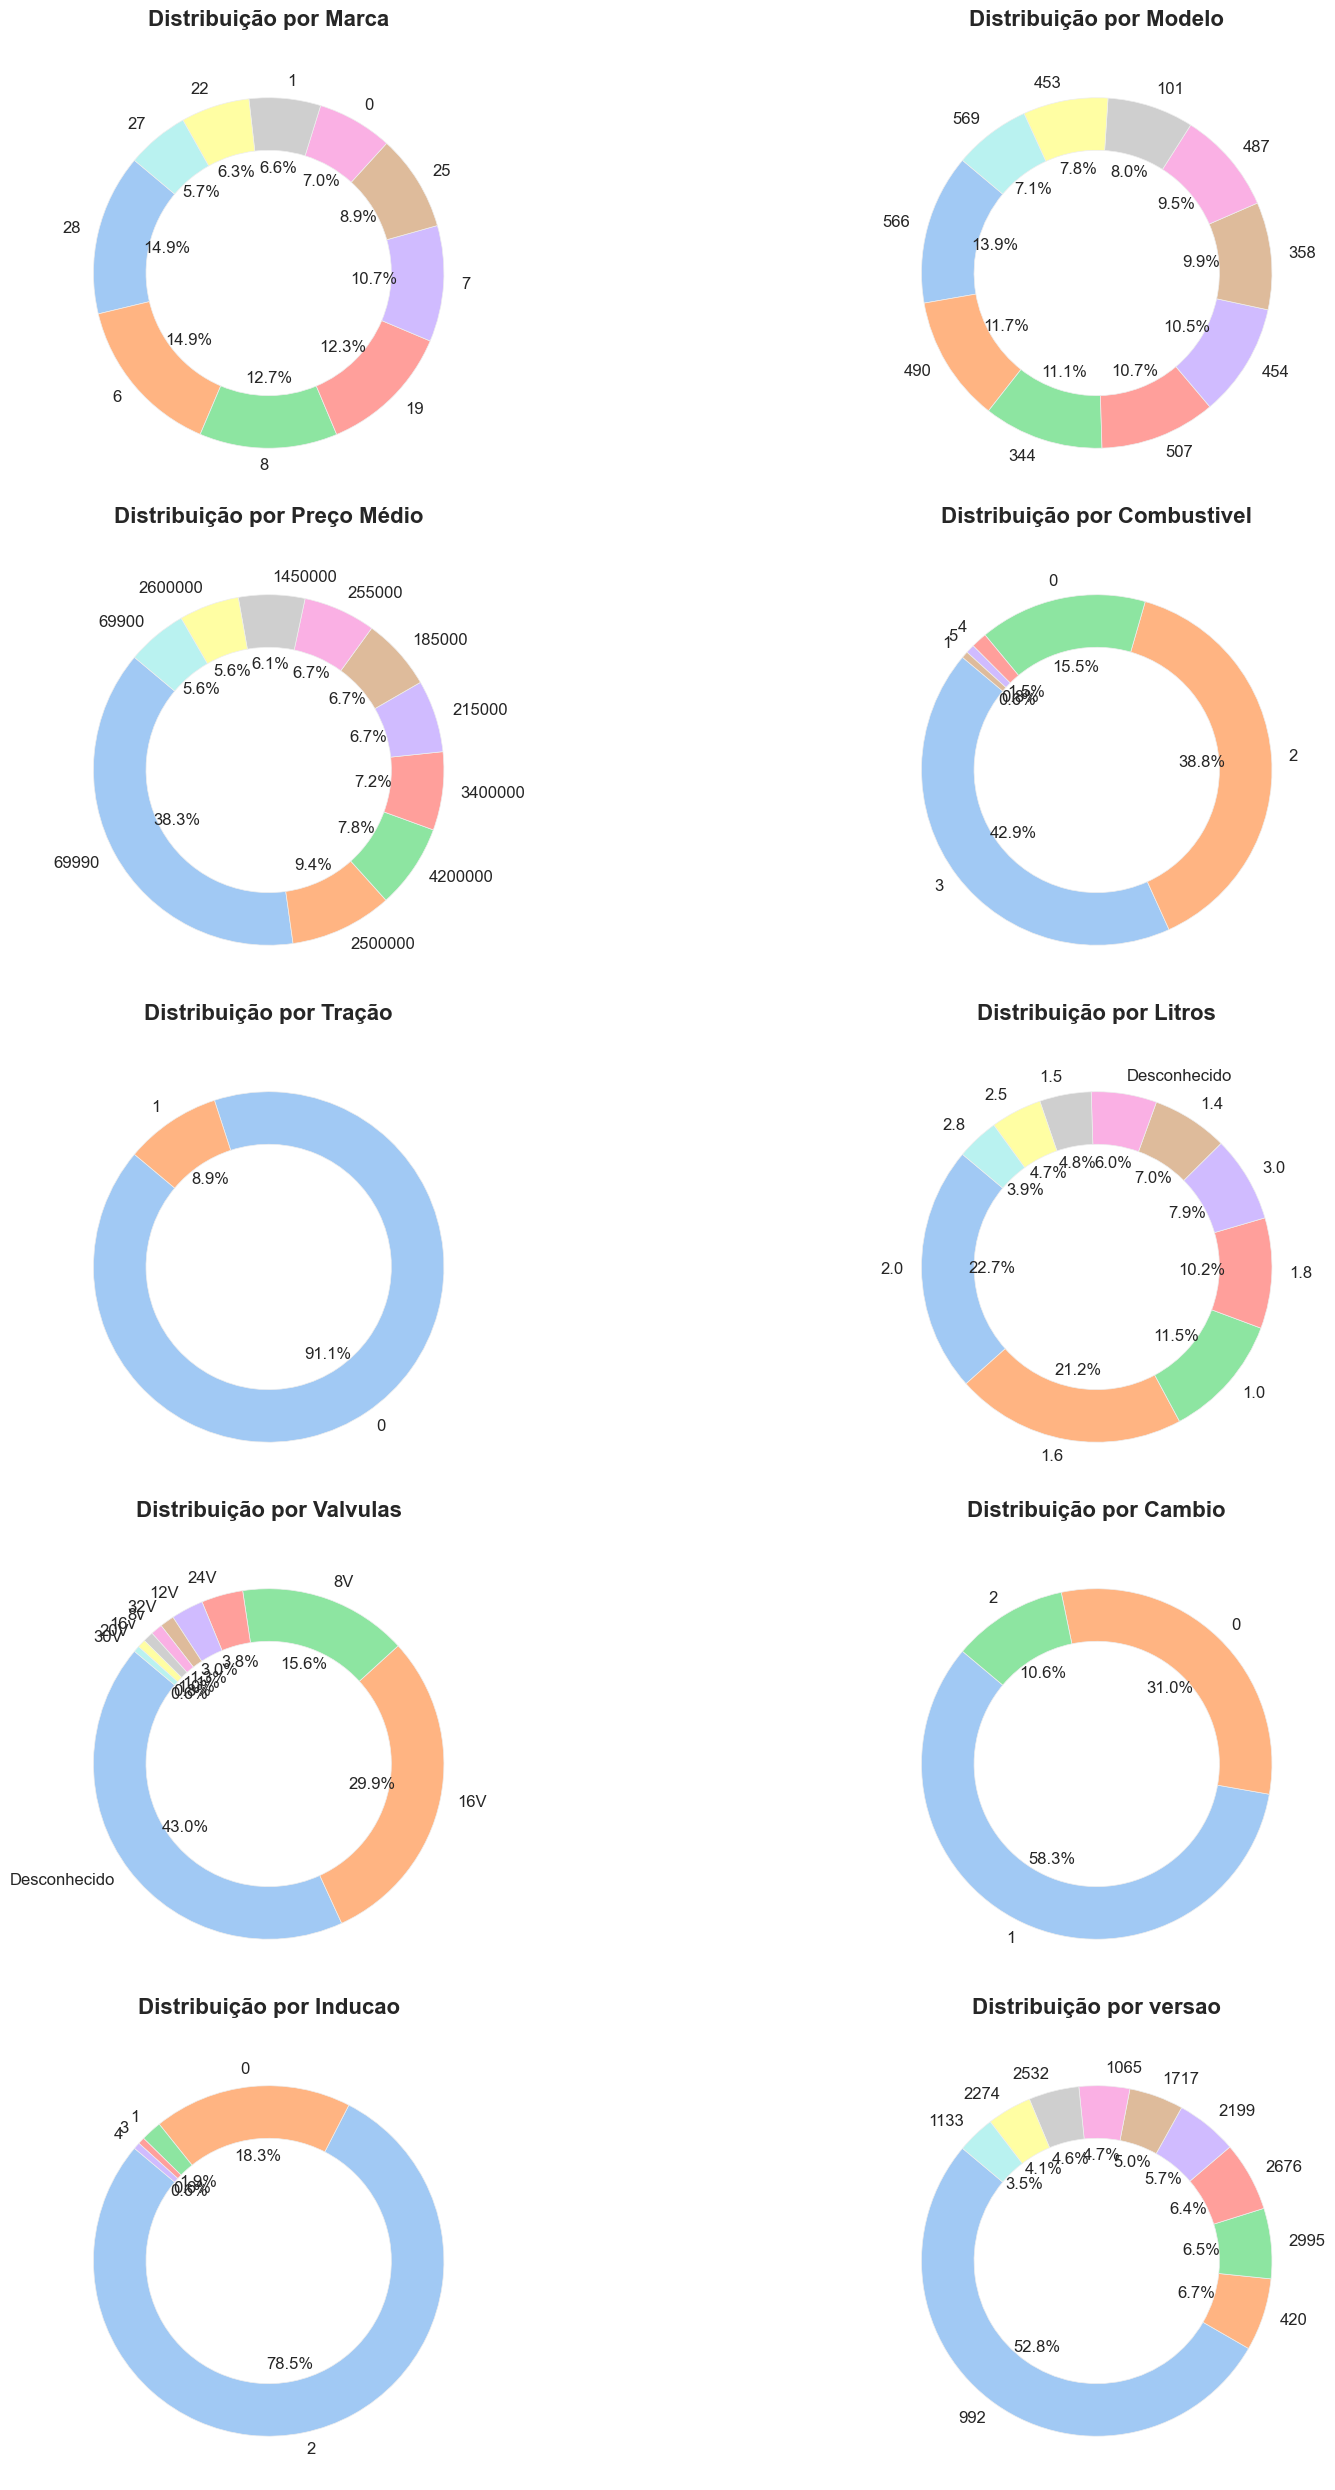

In [64]:
# Melhorei a visualização do gráfico de pizza
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
plt.style.use('ggplot')

# Cores
colors = sns.color_palette("pastel")

# Lista de colunas para visualização
columns_to_plot = ['Marca', 'Modelo', 'Preço Médio', 'Combustivel', 'Tração', 'Litros', 'Valvulas', 'Cambio', 'Inducao', 'versao']

# Criando subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

for i, column in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3), textprops={'fontsize': 12}, ax=ax)
    ax.set_title(f'Distribuição por {column}', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('')

# Ajustando o layout
plt.tight_layout()
plt.show()



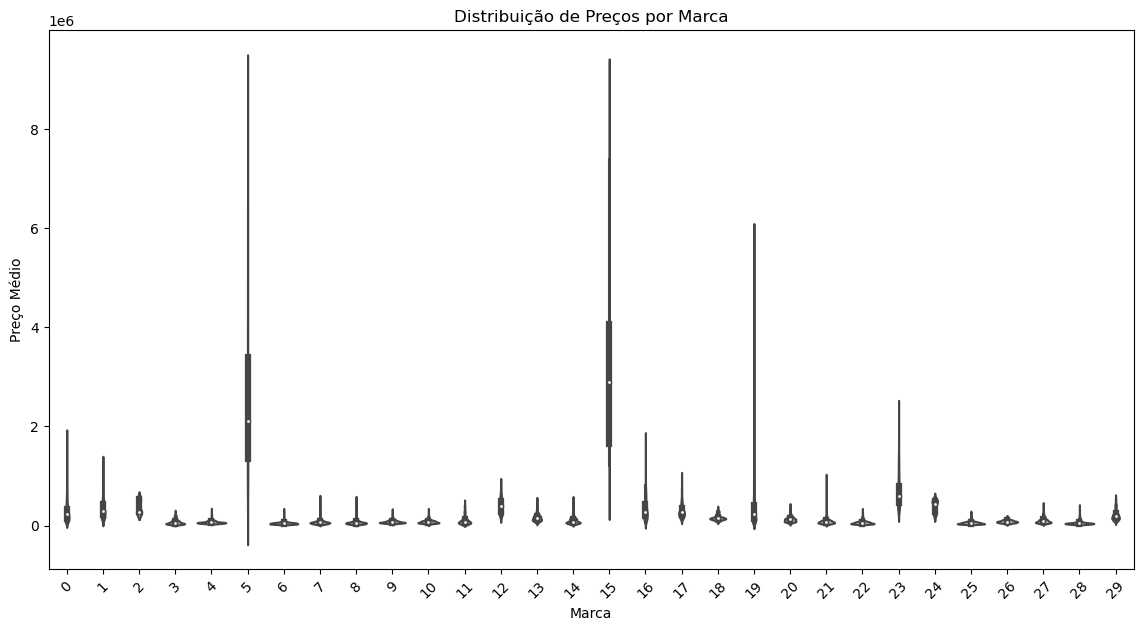

In [47]:
#Violin Plots
plt.figure(figsize=(14, 7))
sns.violinplot(x=df['Marca'], y=df['Preço Médio'])
plt.title('Distribuição de Preços por Marca')
plt.xlabel('Marca')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()


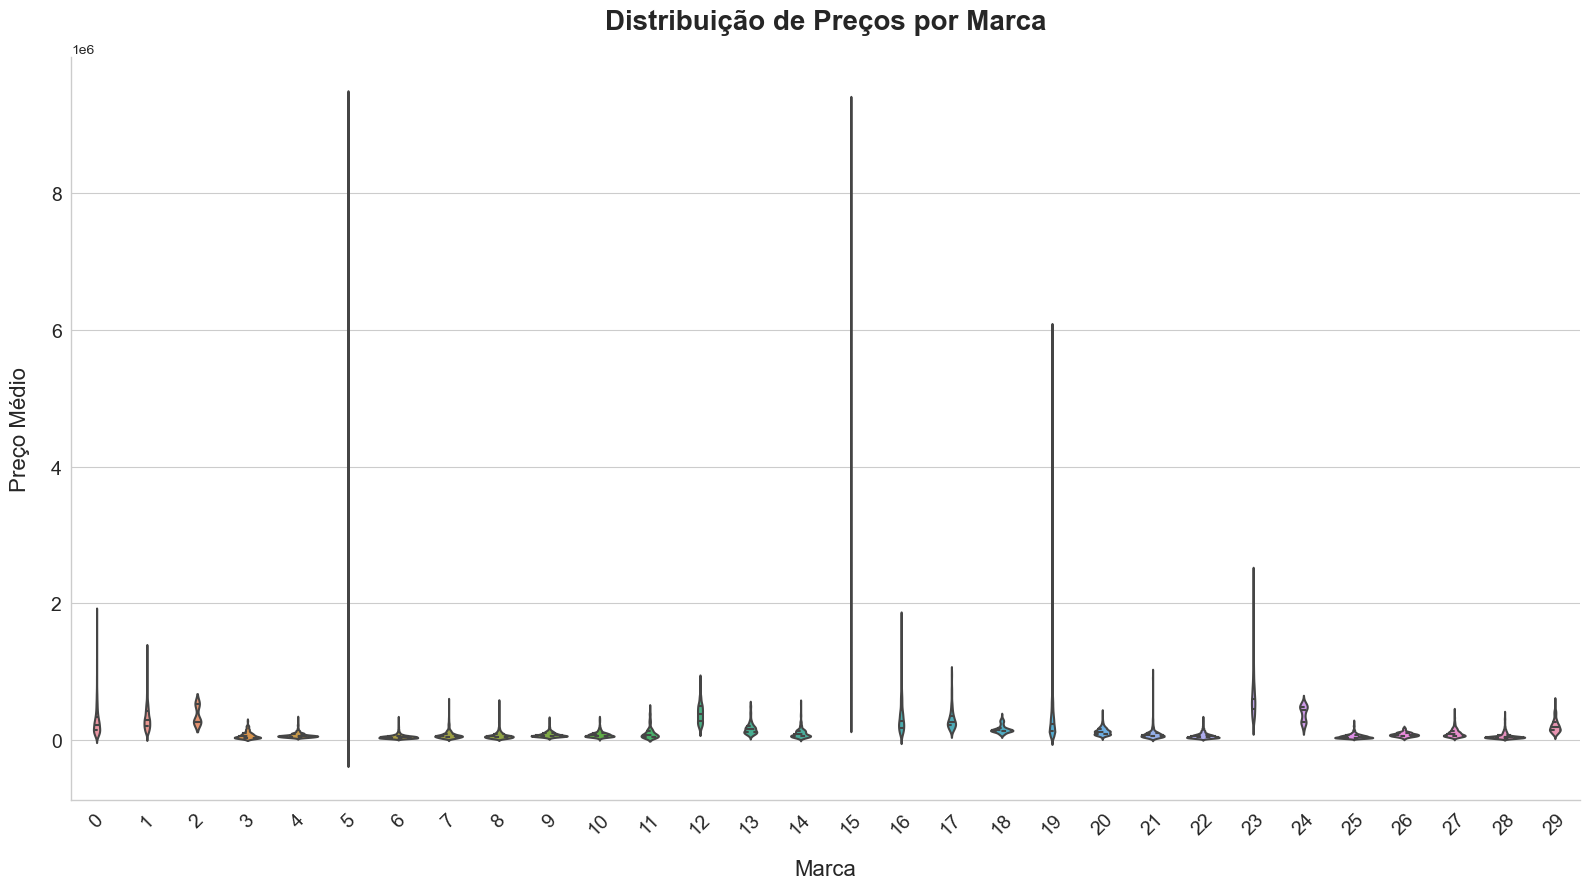

In [65]:
# Aprimorei o gráfico de Violin Plot e torná-lo mais profissional

import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Violin Plots
plt.figure(figsize=(16, 9))
sns.violinplot(x=df['Marca'], y=df['Preço Médio'], inner="quartile", width=0.8)

# Título e rótulos
plt.title('Distribuição de Preços por Marca', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Marca', fontsize=16, labelpad=15)
plt.ylabel('Preço Médio', fontsize=16, labelpad=15)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Removendo as bordas superior e direita
sns.despine(top=True, right=True)

# Mostrando o gráfico
plt.tight_layout()
plt.show()

